In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

****Phase1****                                                                                                                                     **Dataload**                                                                                                                         
***basic information and summary***

In [2]:
df=pd.read_csv("diabetes.csv")
display(df.head())
display(df.info())
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Visualisation***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7808\3522399726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=df,palette='Set2')


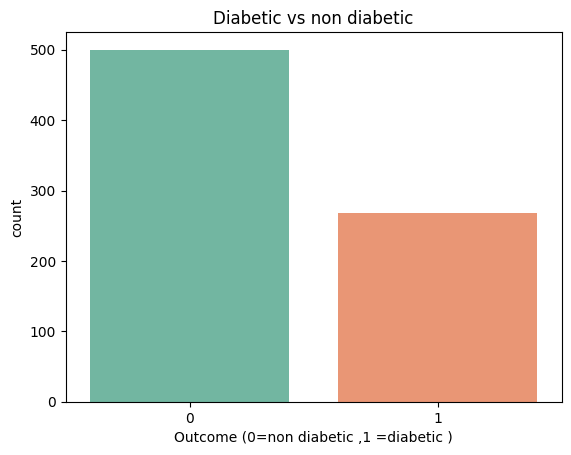

In [4]:
plt.Figure(figsize=(6,5))
sns.countplot(x='Outcome',data=df,palette='Set2')
plt.title("Diabetic vs non diabetic")
plt.xlabel("Outcome (0=non diabetic ,1 =diabetic )")
plt.ylabel("count")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7808\4058883515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome',y='Glucose',data=df,palette='coolwarm')


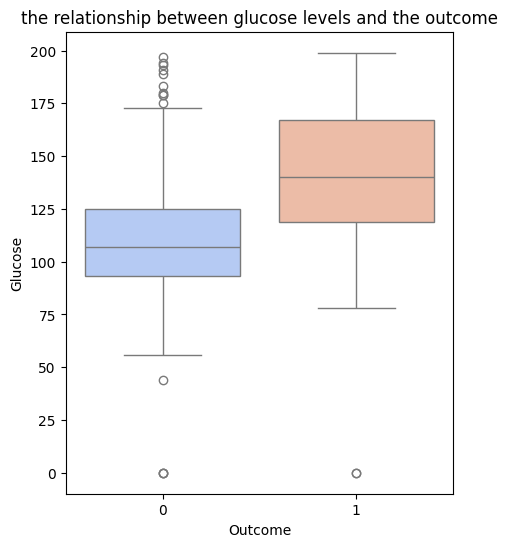

In [5]:
plt.figure(figsize=(5,6))
sns.boxplot(x='Outcome',y='Glucose',data=df,palette='coolwarm')
plt.title('the relationship between glucose levels and the outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7808\2696676425.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome']==0]['Glucose'],label='non diabetic',shade=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7808\2696676425.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome']==1]['Glucose'],label='diabetic',shade=True)


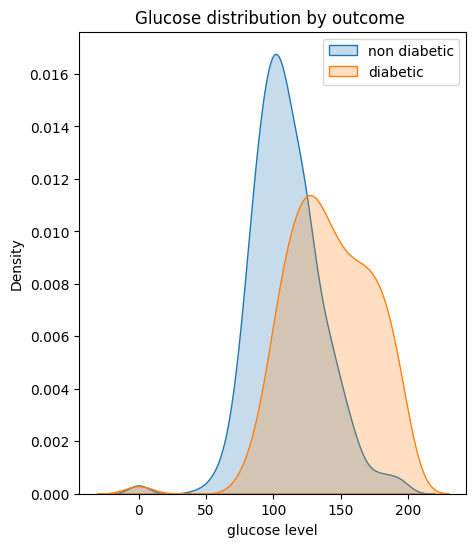

In [6]:
plt.figure(figsize=(5,6))
sns.kdeplot(df[df['Outcome']==0]['Glucose'],label='non diabetic',shade=True)
sns.kdeplot(df[df['Outcome']==1]['Glucose'],label='diabetic',shade=True)
plt.title("Glucose distribution by outcome ")
plt.xlabel("glucose level")
plt.legend()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7808\1533819736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome", y="BMI", data=df, palette="muted")


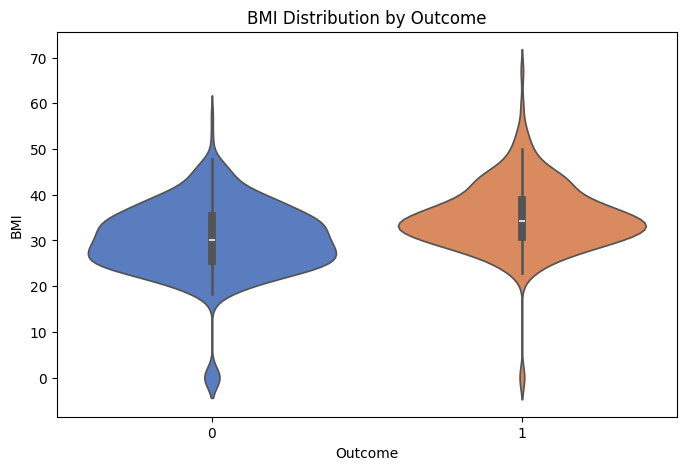

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Outcome", y="BMI", data=df, palette="muted")
plt.title("BMI Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

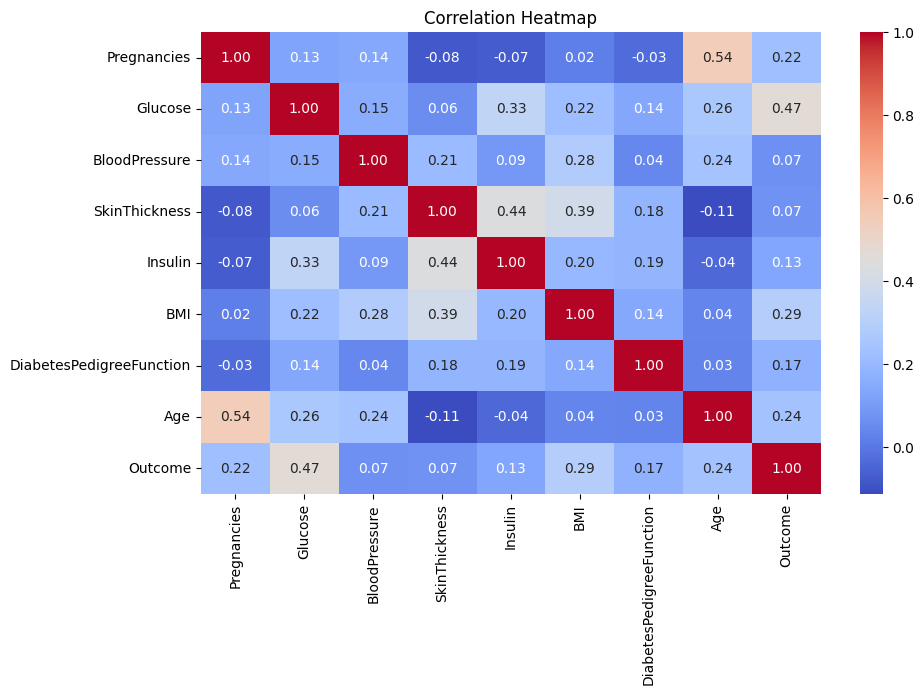

In [8]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

***phase 2 :Prep Your Data for Prime Time***

In [9]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
print("Training set size :",X_train.shape)
print("Testing set size:",X_test.shape)

Training set size : (614, 8)
Testing set size: (154, 8)


In [11]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print("\nBefore scaling:")
print(X_train.head())

print("\nAfter scaling (first 5 rows):")
print(X_train_scaled[:5])


Before scaling:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1       90             62             12       43  27.2   
711            5      126             78             27       22  29.6   
373            2      105             58             40       94  34.9   
46             1      146             56              0        0  29.7   
682            0       95             64             39      105  44.6   

     DiabetesPedigreeFunction  Age  
353                     0.580   24  
711                     0.439   40  
373                     0.225   25  
46                      0.564   29  
682                     0.366   22  

After scaling (first 5 rows):
[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486

***phase 3***

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local

Best Logistic Regression Params: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression CV Score: 0.7801679328268692

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Best Random Forest Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest CV Score: 0.7785685725709716

Random Forest Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Best SVM Params: {'C': 

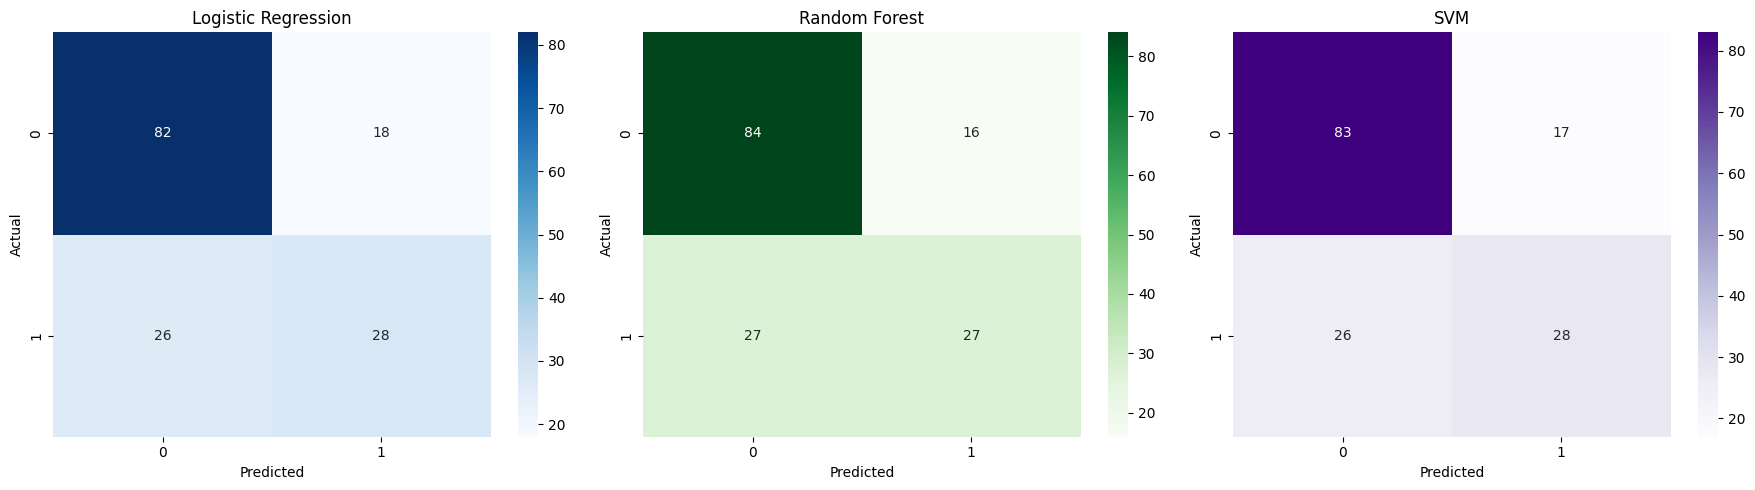


Final Test Accuracy:
Logistic Regression: 0.7142857142857143
Random Forest: 0.7207792207792207
SVM: 0.7207792207792207


In [16]:
#logistic regression 
log_reg=LogisticRegression(max_iter=1000)
param_grid_lr={
    "C":[0.001,0.1,1,10],
    "penalty":["l1","l2","elasticnet",None],
    "solver":["saga","lbfgs","liblinear"]
}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

y_pred_lr = grid_lr.predict(X_test_scaled)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression CV Score:", grid_lr.best_score_)
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))


rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)  # Trees don't need scaling

y_pred_rf = grid_rf.predict(X_test)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest CV Score:", grid_rf.best_score_)
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


svm = SVC(probability=True, random_state=42)

param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

y_pred_svm = grid_svm.predict(X_test_scaled)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM CV Score:", grid_svm.best_score_)
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Purples", ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


print("\nFinal Test Accuracy:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("SVM:", accuracy_score(y_test, y_pred_svm))

In [17]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_model = grid_rf.best_estimator_
print("✅ Best Random Forest Parameters:", grid_rf.best_params_)


def predict_diabetes(input_data, model=best_model):
    """
    Predict if a patient is diabetic or not.
    
    Parameters:
    input_data : list or array of 8 values in the order:
                 [Pregnancies, Glucose, BloodPressure, SkinThickness, 
                  Insulin, BMI, DiabetesPedigreeFunction, Age]
    model      : trained Random Forest model
    
    Returns:
    dict : prediction label + probability
    """

    input_array = np.array(input_data).reshape(1, -1)
    
    
    prediction = model.predict(input_array)[0]
    

    probability = model.predict_proba(input_array)[0][1]  # probability of diabetes
    
    result = {
        "Prediction": "Diabetic" if prediction == 1 else "Non-Diabetic",
        "Probability": f"{probability*100:.2f}%"
    }
    return result



✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [18]:

sample_patient = [2, 120, 70, 20, 79, 32.0, 0.5, 33]

print("\n🔮 Prediction for sample patient:")
print(predict_diabetes(sample_patient))


🔮 Prediction for sample patient:
{'Prediction': 'Non-Diabetic', 'Probability': '33.87%'}


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
